In [74]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [75]:
df = pd.read_csv("titanic_train.csv")

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<Axes: >

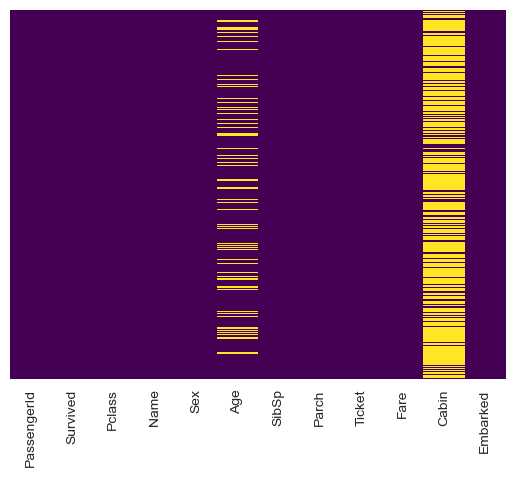

In [78]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [79]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

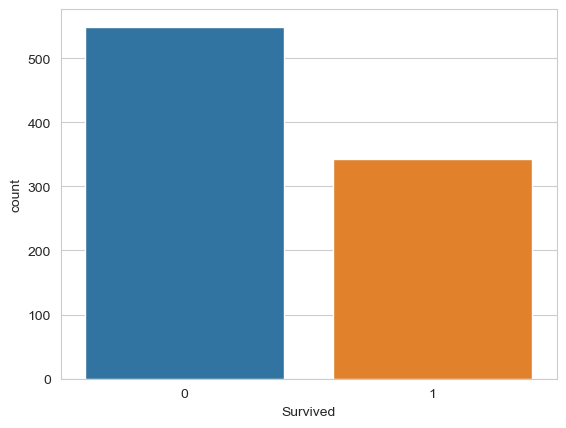

In [80]:
sns.countplot(x = "Survived", data = df)

<Axes: xlabel='Survived', ylabel='count'>

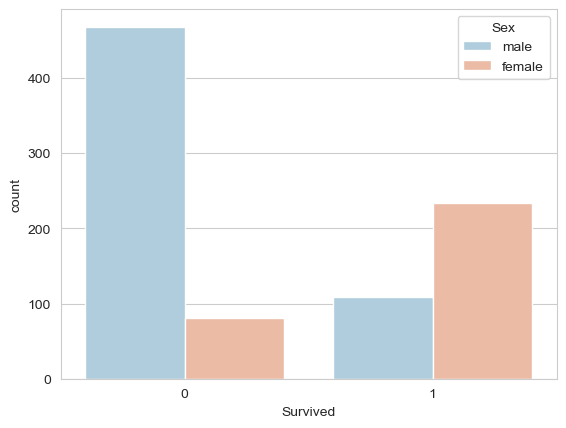

In [81]:
sns.countplot(x = "Survived", data = df, hue = "Sex", palette = "RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

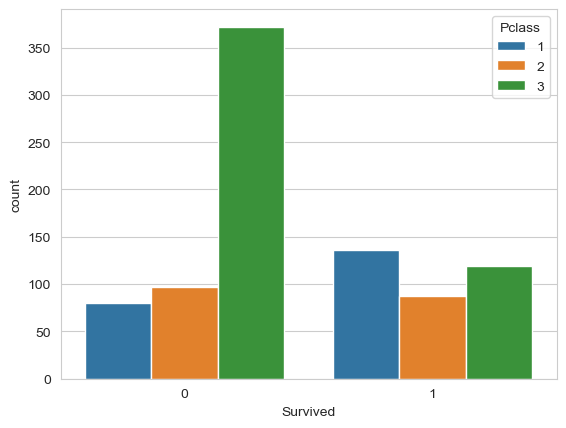

In [82]:
sns.countplot(x = "Survived", data = df, hue = "Pclass")

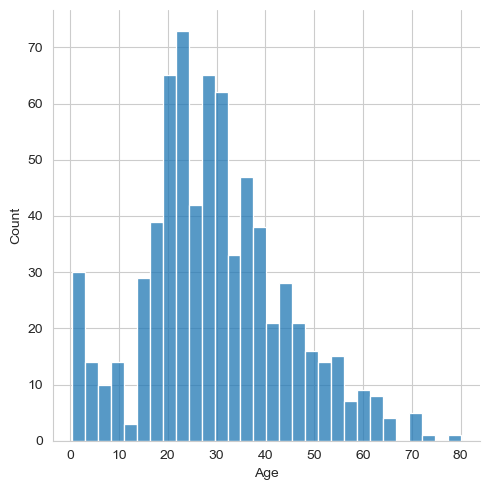

In [83]:
sns.displot(df["Age"].dropna(), bins = 30)

<Axes: ylabel='Frequency'>

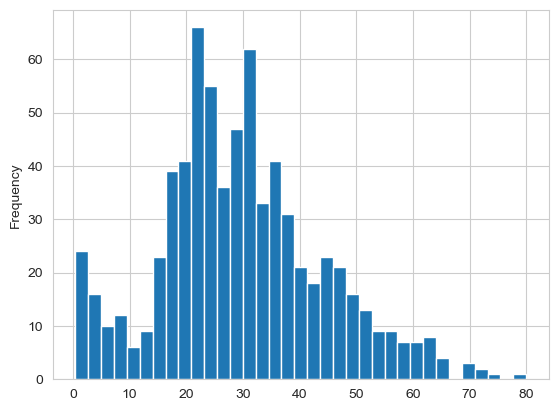

In [84]:
df["Age"].plot.hist(bins = 35)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

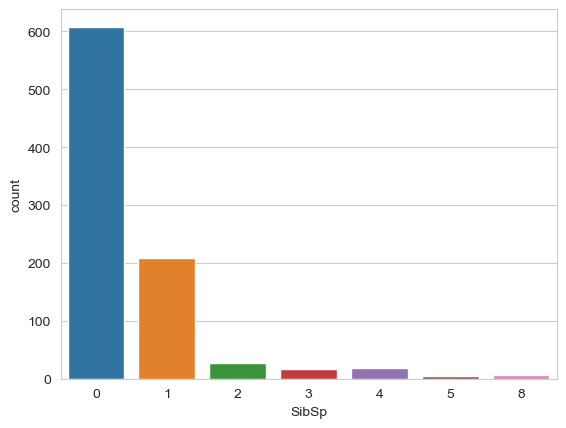

In [86]:
sns.countplot(x = "SibSp", data = df)

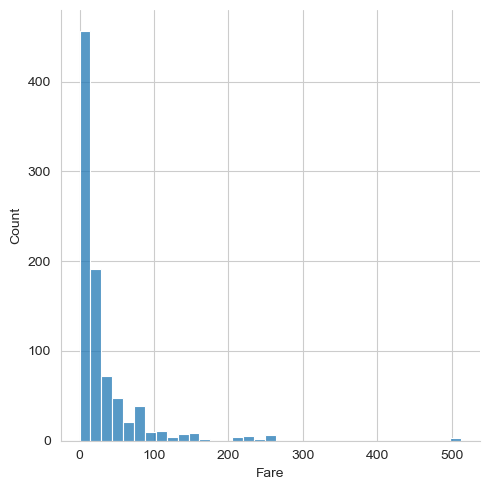

In [87]:
sns.displot(df["Fare"], bins = 35)

In [88]:
import cufflinks as cf

In [89]:
cf.go_offline()

In [90]:
df["Fare"].iplot(kind = "hist", bins = 35)

<Axes: xlabel='Pclass', ylabel='Age'>

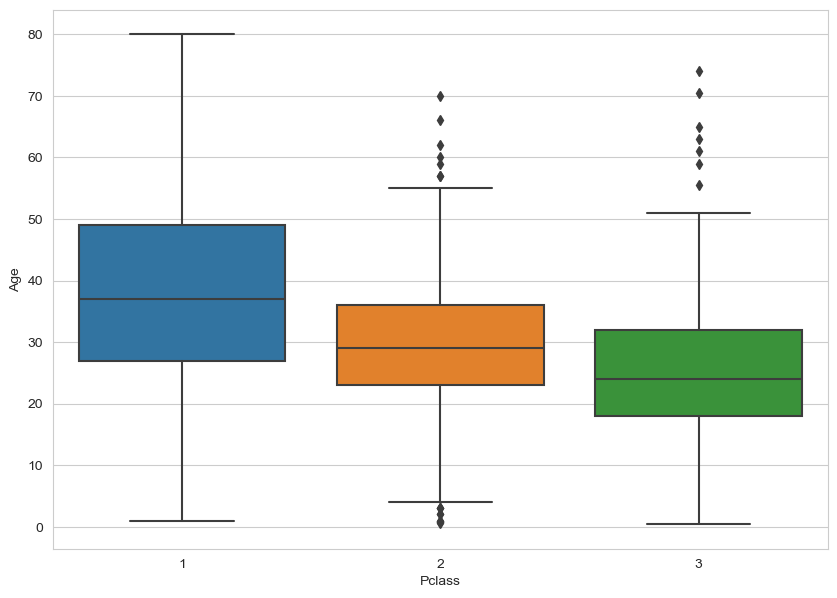

In [29]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Pclass", y = "Age", data = df)

In [30]:
def impute_age(cols) : 
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): 
        if Pclass == 1 : return 37 
        elif Pclass == 2 :return 29 
        else : return 24
    else : return Age 

In [31]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis = 1)

<Axes: >

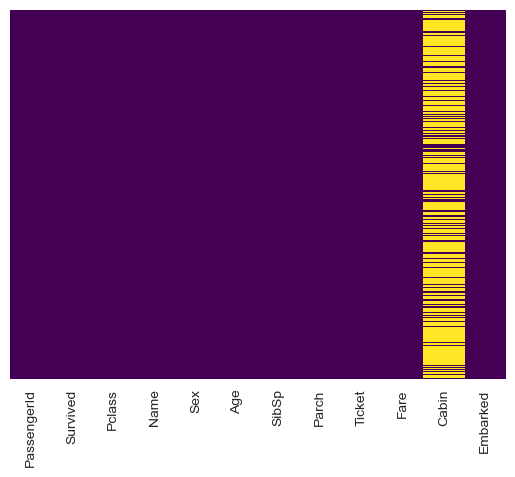

In [32]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [33]:
df.drop("Cabin", axis = 1, inplace = True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

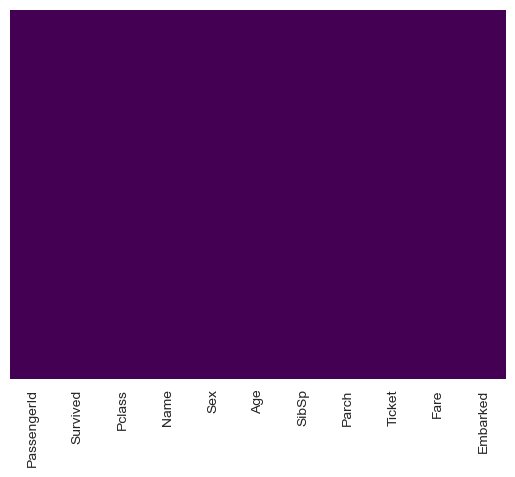

In [35]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [36]:
df.dropna(inplace = True)

<Axes: >

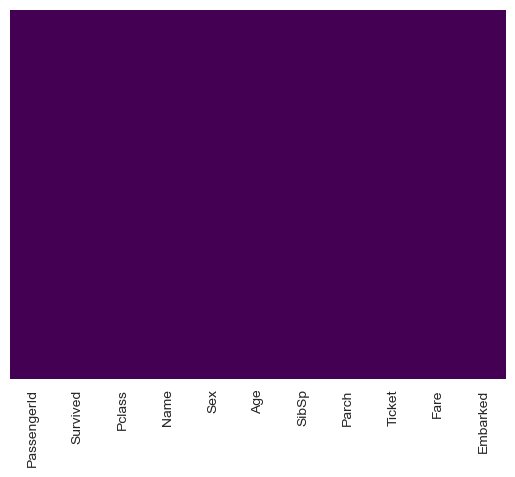

In [41]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [44]:
sex = pd.get_dummies(df["Sex"],drop_first = True)

In [45]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [46]:
embark = pd.get_dummies(df["Embarked"],drop_first = True)

In [47]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [48]:
df = pd.concat([df,sex, embark], axis = 1)

In [54]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
df.drop(["Sex", "Embarked", "Name", "Ticket"],axis = 1, inplace = True)

KeyError: "['Sex', 'Embarked', 'Name', 'Ticket'] not found in axis"

In [ ]:
df.head()

In [55]:
df.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [56]:
df.drop(["PassengerId"],axis = 1, inplace = True)

In [57]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [58]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression()

In [64]:
logmodel.fit(X_train, y_train)

/Users/juju/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [65]:
prediction = logmodel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
(confusion_matrix(y_test, prediction))

array([[147,  16],
       [ 30,  74]])